# CSCI 3352 Biological Networks, Spring 2022, Prof. Clauset

# Unholy Epidemiology 

***

**Team names**: Sayed Abdulmohsen Alhashemi

***

None shall survive

***
* [Documentation for networkx](https://networkx.github.io/documentation/stable/)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [1]:
#@title Imports
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import random as rnd
rnd.seed()
import copy

In [2]:
#@title Network visualization functions drawGz and drawGzSpring
def drawGz(G,z):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    colors = ['#d61111','#11d646','#11c6d6','#d67711','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)
    
    node_colors = []
    for i in G.nodes():
        if z[i]=='S':
            cid = 0
        if z[i]=='Z' or z[i] == 'I':
            cid = 1
        if z[i]=='D' or z[i] == 'R':
            cid = 2
        node_colors.append(colors[int(cid)])
    nsize  = 600
    flabel = True

    if G.order() > 50:
        nsize  = 100
        flabel = False
    
    nx.draw_kamada_kawai(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it prettier
    #nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                   # turn off axes
    plt.show() 

    return

def drawGzSpring(G,z):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    colors = ['#d61111','#11d646','#11c6d6','#d67711','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)
    
    node_colors = []
    for i in G.nodes():
        if z[i]=='S':
            cid = 0
        if z[i]=='Z' or z[i] == 'I':
            cid = 1
        if z[i]=='D' or z[i] == 'R':
            cid = 2
        node_colors.append(colors[int(cid)])
    nsize  = 600
    flabel = True

    if G.order() > 50:
        nsize  = 100
        flabel = False
    
    nx.draw_spring(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it prettier
    #nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                   # turn off axes
    plt.show() 

    return

In [8]:
#@title SIR model
def SIR(G,s,beta,gmma,reps,flag):
    # Basic SIR simulation
    
    # YOUR CODE
    St = [] # S(t), time series of number of S nodes per time step t
    It = [] # I(t), time series of number of I nodes per time step t
    Rt = [] # R(t), time series of number of R nodes per time step t
    n  = G.order()
    zt = dict()
    xt = dict()
    for node in G.nodes():
      zt[node] = 'S'  # all nodes S, initially
      xt[node] = -1   # x(t), stores the time a node was infected

    si = []

    initial_infected = rnd.sample(G.nodes(), s)
    for i in initial_infected:
      zt[i] = 'I'
    
    t = 1

    if flag:
        print(f'time step {t}')
        drawGz(G,zt)
        

    Sc,Ic,Rc = len(zt)-s,s,0 # S,I,R node counts, initial
    St.append(Sc)
    It.append(Ic)
    Rt.append(Rc)

    while any(xi == 'I' for xi in zt.values()) and t < reps:
        zu = copy.deepcopy(zt) # nodes states for next time step (synchronous updates)
        # do S -> I transitions
        for e in G.edges():
            i,j = e[0],e[1]           # this edge (i,j)

            if zt[i]=='I' and zt[j]=='S' and zu[j]!='I':
                if rnd.random() < beta:
                    xt[i] = t
                    zu[j] = 'I'       # i infects j for next round
                    Sc,Ic = Sc-1,Ic+1 # update counts

            if zt[i]=='S' and zt[j]=='I' and zu[i]!='I':
                if rnd.random() < beta:
                    xt[i] = t
                    zu[i] = 'I'       # j infects i for next round
                    Sc,Ic = Sc-1,Ic+1 # update counts

        # do I -> R transitions
        for i in G.nodes():
            if zt[i] == 'I' and rnd.random() < gmma:
                zu[i] = 'R'           # i recovers (R)
                Ic,Rc = Ic-1,Rc+1     # update counts

        # update all states synchronously, update clock
        zt = copy.deepcopy(zu)
        t  = t+1
        if flag:
            print(f'time step {t}')
            drawGz(G,zt)

        St.append(Sc)
        It.append(Ic)
        Rt.append(Rc) # append these counts to the time series

    # report how it went
    print(f'number of steps in epidemic: {t-1}')
    print(f'initial number of S: {St[0]}')
    print(f'initial number of I: {It[0]}')
    print(f'final number of S: {Sc}')
    print(f'final number of I: {Ic}')
    print(f'final number of R: {Rc}')

    # plot the S(t),I(t),R(t) time series nicely
    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.plot(range(t), St, 'bo-', alpha=0.5,label='S(t)')  # plot the log-likelihood trajectory
    plt.plot(range(t), It, 'gv-', alpha=0.5,label='I(t)')  # plot the log-likelihood trajectory
    plt.plot(range(t), Rt, 'rs-', alpha=0.5,label='R(t)')  # plot the log-likelihood trajectory
    plt.ylabel('number of nodes')
    plt.xlabel('time, t')
    plt.legend(loc='upper right');
    plt.show()
    return St,It,Rt,zt,xt

In [4]:
#@title SZD model 
def SZD(G, zombies, b, sk, zk, reps, flag=1):

    n  = G.order()
    zt = dict()
    xt = dict()
    for node in G.nodes():
      zt[node] = 'S'  # all nodes S, initially
      xt[node] = -1   # x(t), stores the time a node was infected

    beta = b     # probability of {S-Z} -> {Z-Z}, probability that a human becomes a zombie 
    s_kill  = sk # probability of {S-Z} -> {D-Z}, this is the probability that a human kills a zombie
    z_kill = zk  # probability of {Z-S} -> {Z-D}, this is the probability that a zombie kills a human

    St = []       # S(t), time series of number of S nodes per time step t
    Zt = []       # Z(t), time series of number of Z nodes per time step t
    Dt = []       # R(t), time series of number of D nodes per time step t
    zn = zombies
    zi = []
    # Zombifying specified portion of population
    initial_infected = rnd.sample(G.nodes(), zn)
    for i in initial_infected:
      zt[i] = 'Z'
    t = 1

    if flag:
        print(f'time step {t}')
        drawGz(G,zt)

    Sc,Zc,Dc = len(zt)-zn,zn,0 # S,Z,D node counts, initial
    St.append(Sc)
    Zt.append(Zc)
    Dt.append(Dc)


    while any(xi == 'S' for xi in zt.values()) and any(xi == 'Z' for xi in zt.values()) and t < reps: 
        zu = copy.deepcopy(zt) # nodes states for next time step (synchronous updates)
        # do S -> Z transitions and kill pro
        for e in G.edges():
            i,j = e[0],e[1]           # this edge (i,j)
            if zt[j]=='S' and zt[i]=='Z' and zu[j]!='Z' and zu[j]!='D' and zt[i] != 'D':
                pbt = rnd.random() #less than beta = bite
                pzk = rnd.random() #greater than kill = survive
                psk = rnd.random() 
                #zombie bites human, human turns
                if pbt < beta and pzk > z_kill and psk > s_kill: 
                    zu[j] = 'Z'       # i infects j for next round
                    Sc, Zc = Sc-1, Zc+1
                #bite + human killed
                elif pbt < beta and pzk < z_kill and psk > s_kill:
                    zu[j] = 'D'
                    Sc, Dc = Sc-1, Dc+1
                #no bite, zombie killed
                elif pbt > beta and pzk > z_kill and psk < s_kill:
                    zu[i] = 'D'
                    Zc, Dc = Zc-1, Dc+1
                #bite + zombie killed + human killed
                elif pbt < beta and pzk < z_kill and psk < s_kill:
                    zu[j] = 'D'
                    zu[i] = 'D'
                    Sc, Zc, Dc = Sc-1, Zc-1, Dc+2
                #bite + zombie killed + human turns
                elif pbt < beta and pzk > z_kill and psk < s_kill:
                    zu[i] = 'D'
                    zu[j] = 'Z'
                    Sc, Dc = Sc-1, Dc+1
            zt = copy.deepcopy(zu)        
            if zt[i]=='S' and zt[j]=='Z' and zu[i]!='Z' and zu[i]!='D' and zt[j] != 'D':
                pbt = rnd.random() #less than beta = bite
                pzk = rnd.random() #greater than kill = survive
                psk = rnd.random()
                if pbt < beta and pzk > z_kill and psk > s_kill: 
                    zu[i] = 'Z'       # j infects i for next round
                    Sc, Zc = Sc-1, Zc+1
                #bite + human killed
                elif pbt < beta and pzk < z_kill and psk > s_kill:
                    zu[i] = 'D'
                    Sc, Dc = Sc-1, Dc+1
                #no bite, zombie killed
                elif pbt > beta and pzk > z_kill and psk < s_kill:
                    zu[j] = 'D'
                    Zc, Dc = Zc-1, Dc+1
                #bite + zombie killed + human killed
                elif pbt < beta and pzk < z_kill and psk < s_kill:
                    zu[j] = 'D'
                    zu[i] = 'D'
                    Sc, Zc, Dc = Sc-1, Zc-1, Dc+2
                #bite + zombie killed + human turns
                elif pbt < beta and pzk > z_kill and psk < s_kill:
                    zu[j] = 'D'
                    zu[i] = 'Z'
                    Sc, Dc = Sc-1, Dc+1
            zt = copy.deepcopy(zu)    
            #print(f"POST|||||||EDGE: {e}, {i}: {zu[i]}, {j}: {zu[j]}, Sc: {Sc}, Zc: {Zc}, Dc: {Dc}")


        # do I -> R transitions
        # for i in G.nodes():
        #    if zt[i] == 'I' and rnd.random() < gmma:
        #        zu[i] = 'R'           # i recovers (R)
        #        Zc,Rc = Zc-1,Rc+1     # update counts

        # update all states synchronously, update clock
        zt = copy.deepcopy(zu)
        t  = t+1
        
        if flag:
            print(f'time step {t}')
            drawGz(G,zt)

        St.append(Sc)
        Zt.append(Zc)
        Dt.append(Dc) # append these counts to the time series

        #print(f"St: {St}, Zt: {Zt}, Dt: {Dt}")

    # report how it went
    print(f'number of steps in epidemic: {t}')
    print(f'initial number of S: {St[0]}')
    print(f'initial number of Z: {Zt[0]}')
    print(f'final number of S: {Sc}')
    print(f'final number of Z: {Zc}')
    print(f'final number of D: {Dc}')

    # plot the S(t),I(t),R(t) time series nicely
    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.plot(range(t), St, 'bo-', alpha=0.5,label='S(t)')  # plot the log-likelihood trajectory
    plt.plot(range(t), Zt, 'gv-', alpha=0.5,label='Z(t)')  # plot the log-likelihood trajectory
    plt.plot(range(t), Dt, 'rs-', alpha=0.5,label='D(t)')  # plot the log-likelihood trajectory
    plt.ylabel('number of nodes')
    plt.xlabel('time, t')
    plt.legend(loc='upper right');
    plt.show()

In [5]:
#@title Interaction Queue 
def updatePostInfect(G, zu, zs, sz, curr):
  # Helper function to update Z-S and S-Z interaction arrays after infection 
  for neighbor in G[curr]:
    if zu[neighbor] == 'S':
      zs.append((curr, neighbor))
      sz.append((neighbor, curr))

# Cleans interactions array to remove states that have been changed
def updateInteractions(G, zu, zs, sz):
  for e in zs:
    if zu[e[0]] != 'Z' and e in zs:
      zs.remove(e)
    if zu[e[1]] != 'S' and e in zs:
      zs.remove(e)
  for e in sz:
    if zu[e[0]] != 'S' and e in sz:
      sz.remove(e)
    if zu[e[1]] != 'Z' and e in sz:
      sz.remove(e)

In [6]:
#@title SZD model WITH INTERACTION QUEUE 
def SZD_INTERACT(G, zpop, b, sk, zk, reps, flag=1):
    # ------ INITIALIZATION ------ #
    zt = dict()
    xt = dict()
    for node in G.nodes():
      zt[node] = 'S'  # all nodes S, initially
      xt[node] = -1   # x(t), stores the time a node was infected
    St = []       # S(t), time series of number of S nodes per time step t
    Zt = []       # Z(t), time series of number of Z nodes per time step t
    Rt = []       # R(t), time series of number of D nodes per time step t
    zi = []

    # Initialize list of Z-S and S-Z interactions

    initial_infected = rnd.sample(G.nodes(), zpop)
    zs = []  # List of Z-S edges
    sz = []  # List of S-Z edges

    for i in initial_infected:
      zt[i] = 'Z'
      updatePostInfect(G, zt, zs, sz, i)


    beta = b     # probability of {S-Z} -> {Z-Z}, probability that a human becomes a zombie 
    s_kill  = sk # probability of {S-Z} -> {D-Z}, this is the probability that a human kills a zombie
    z_kill = zk  # probability of {Z-S} -> {Z-D}, this is the probability that a zombie kills a human

    St = []       # S(t), time series of number of S nodes per time step t
    Zt = []       # Z(t), time series of number of Z nodes per time step t
    Dt = []       # R(t), time series of number of D nodes per time step t
    # Zombifying specified portion of population

    t = 1

    if flag:
        print(f'time step {t}')
        drawGz(G,zt)

    Sc,Zc,Dc = len(zt)-zpop,zpop,0 # S,Z,D node counts, initial
    St.append(Sc)
    Zt.append(Zc)
    Dt.append(Dc)


    while len(sz) > 0 and len(zs) > 0:
        zu = copy.deepcopy(zt) # nodes states for next time step (synchronous updates)
        # do S -> Z transitions and kill prob
        zs_interaction = rnd.sample(zs, 1)[0]
        s = zs_interaction[1]
        z = zs_interaction[0]
        # this edge (i,j)
        if zu[s]!='Z' and zu[z]!='D' and zu[s]!='D':
            pbt = rnd.random() #less than beta = bite
            pzk = rnd.random() #greater than kill = survive
            psk = rnd.random() 
            #zombie bites human, human turns
            if pbt < beta and pzk > z_kill and psk > s_kill: 
                zu[s] = 'Z'       # i infects j for next round
                Sc, Zc = Sc-1, Zc+1
                updatePostInfect(G, zu, zs, sz, s)
            #bite + human killed
            elif pbt < beta and pzk < z_kill and psk > s_kill:
                zu[s] = 'D'
                Sc, Dc = Sc-1, Dc+1
            #no bite, zombie killed
            elif pbt > beta and pzk > z_kill and psk < s_kill:
                zu[z] = 'D'
                Zc, Dc = Zc-1, Dc+1
            #bite + zombie killed + human killed
            elif pbt < beta and pzk < z_kill and psk < s_kill:
                zu[z] = 'D'
                zu[s] = 'D'
                Sc, Zc, Dc = Sc-1, Zc-1, Dc+2
            #bite + zombie killed + human turns
            elif pbt < beta and pzk > z_kill and psk < s_kill:
                zu[z] = 'D'
                zu[s] = 'Z'
                Sc, Dc = Sc-1, Dc+1
                updatePostInfect(G, zu, zs, sz, s)
        zt = copy.deepcopy(zu)   
        updateInteractions(G, zt, zs, sz)
        
        #print(f'DEBUG len(sz) = {len(sz)}')
        if len(sz) > 0:
          sz_interaction = rnd.sample(sz, 1)[0]
          s = sz_interaction[0]
          z = sz_interaction[1]  
          if zu[s]!='Z' and zu[z]!='D' and zu[s]!='D':
              pbt = rnd.random() #less than beta = bite
              pzk = rnd.random() #greater than kill = survive
              psk = rnd.random()
              if pbt < beta and pzk > z_kill and psk > s_kill: 
                  zu[s] = 'Z'       # j infects i for next round
                  Sc, Zc = Sc-1, Zc+1
                  updatePostInfect(G, zu, zs, sz, s)
              #bite + human killed
              elif pbt < beta and pzk < z_kill and psk > s_kill:
                  zu[s] = 'D'
                  Sc, Dc = Sc-1, Dc+1
              #no bite, zombie killed
              elif pbt > beta and pzk > z_kill and psk < s_kill:
                  zu[z] = 'D'
                  Zc, Dc = Zc-1, Dc+1
              #bite + zombie killed + human killed
              elif pbt < beta and pzk < z_kill and psk < s_kill:
                  zu[s] = 'D'
                  zu[z] = 'D'
                  Sc, Zc, Dc = Sc-1, Zc-1, Dc+2
              #bite + zombie killed + human turns
              elif pbt < beta and pzk > z_kill and psk < s_kill:
                  zu[z] = 'D'
                  zu[s] = 'Z'
                  Sc, Dc = Sc-1, Dc+1
                  updatePostInfect(G, zu, zs, sz, s)
          zt = copy.deepcopy(zu)
          updateInteractions(G, zt, zs, sz)
        #zt = copy.deepcopy(zu)    
        #print(f"POST|||||||EDGE: {e}, {i}: {zu[i]}, {j}: {zu[j]}, Sc: {Sc}, Zc: {Zc}, Dc: {Dc}")


        # do I -> R transitions
        # for i in G.nodes():
        #    if zt[i] == 'I' and rnd.random() < gmma:
        #        zu[i] = 'R'           # i recovers (R)
        #        Zc,Rc = Zc-1,Rc+1     # update counts

        # update all states synchronously, update clock
        
        t  = t+1
        
        if flag:
            print(f'time step {t}')
            drawGz(G,zt)

        St.append(Sc)
        Zt.append(Zc)
        Dt.append(Dc) # append these counts to the time series

        #print(f"St: {St}, Zt: {Zt}, Dt: {Dt}")

    # report how it went
    print(f'number of steps in epidemic: {t}')
    print(f'initial number of S: {St[0]}')
    print(f'initial number of Z: {Zt[0]}')
    print(f'final number of S: {Sc}')
    print(f'final number of Z: {Zc}')
    print(f'final number of D: {Dc}')

    # plot the S(t),I(t),R(t) time series nicely
    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.plot(range(t), St, 'bo-', alpha=0.5,label='S(t)')  # plot the log-likelihood trajectory
    plt.plot(range(t), Zt, 'gv-', alpha=0.5,label='Z(t)')  # plot the log-likelihood trajectory
    plt.plot(range(t), Dt, 'rs-', alpha=0.5,label='D(t)')  # plot the log-likelihood trajectory
    plt.ylabel('number of nodes')
    plt.xlabel('time, t')
    plt.legend(loc='upper right');
    plt.show()

In [39]:
#@title SZR model code
def SZR(G, zpop, beta, kappa, reps, flag, plot_flag, full_reps=0):
  # ------ INITIALIZATION ------ #
  zt = dict()
  xt = dict()
  for node in G.nodes():
    zt[node] = 'S'  # all nodes S, initially
    xt[node] = -1   # x(t), stores the time a node was infected
  St = []       # S(t), time series of number of S nodes per time step t
  Zt = []       # Z(t), time series of number of Z nodes per time step t
  Rt = []       # R(t), time series of number of D nodes per time step t

  # Initialize list of Z-S and S-Z interactions

  initial_infected = rnd.sample(G.nodes(), zpop)
  zs_interactions = []  # List of Z-S edges
  sz_interactions = []  # List of S-Z edges

  for i in initial_infected:
    zt[i] = 'Z'
    updatePostInfect(G, zt, zs_interactions, sz_interactions, i)

  infect = beta/(beta+kappa)
  kill = kappa/(beta+kappa)
  alpha = kappa/beta  

  # We now have our initial set of Z-S interactions
  t = 1


  if flag:
      print(f'time step {t}')
      drawGz(G,zt)
  
  Sc,Zc,Rc = len(zt)-zpop,zpop,0 # S,Z,D node counts, initial
  St.append(Sc)
  Zt.append(Zc)
  Rt.append(Rc)

  # ------ RUN SIMULATION ------ #

  
  if full_reps:
    while len(sz_interactions) > 0 and len(zs_interactions) > 0:
      if t%1000 == 0 and flag:
        print(f'Timestep: {t}')
        drawGz(G,zt)
      zu = copy.deepcopy(zt)
      # At each step of the simulation, one of these Z–S bonds is chosen at random
      zs = rnd.sample(zs_interactions, 1)[0]
      z = zs[0]
      s = zs[1]

      #infections
      if rnd.random() < infect and zu[s]!='Z' and zu[s]!='R':
        zu[s] = 'Z'
        xt[s] = t
        Sc -= 1
        Zc += 1
        updatePostInfect(G, zu, zs_interactions, sz_interactions, s)
        # Update states 
        zt = copy.deepcopy(zu)

      # kills
      sz = rnd.sample(sz_interactions, 1)[0]
      z = sz[1]
      s = sz[0]
      if rnd.random() < kill and zu[z] != 'R' and zu[z] != 'S':
        zu[z] = 'R'
        xt[z] = t
        Zc -= 1
        Rc += 1
        zt = copy.deepcopy(zu)

      updateInteractions(G, zu, zs_interactions, sz_interactions)
      
      t = t+1
      if flag:
          print(f'time step {t}')
          drawGz(G,zt)

      # append these counts to the time series
      St.append(Sc)
      Zt.append(Zc)
      Rt.append(Rc) 
      # Update states 
      zt = copy.deepcopy(zu)
    else:
      while len(sz_interactions) > 0 and len(zs_interactions) > 0 and t < reps:
        zu = copy.deepcopy(zt)
        # At each step of the simulation, one of these Z–S bonds is chosen at random
        zs = rnd.sample(zs_interactions, 1)[0]
        z = zs[0]
        s = zs[1]

        if rnd.random() < infect and zu[s]!='Z' and zu[s]!='R':
          zu[s] = 'Z'
          xt[s] = t
          Sc -= 1
          Zc += 1
          updatePostInfect(G, zu, zs_interactions, sz_interactions, s)
          # Update states 
          zt = copy.deepcopy(zu)

        # kills
        sz = rnd.sample(sz_interactions, 1)[0]
        z = sz[1]
        s = sz[0]
        if rnd.random() < kill and zu[z] != 'R' and zu[z] != 'S':
          zu[z] = 'R'
          Zc -= 1
          Rc += 1
          zt = copy.deepcopy(zu)
        t = t+1
        if flag:
            print(f'time step {t}')
            drawGz(G,zt)

        # append these counts to the time series
        St.append(Sc)
        Zt.append(Zc)
        Rt.append(Rc) 
        # Update states 
        zt = copy.deepcopy(zu)
        updateInteractions(G, zt, zs_interactions, sz_interactions)
  # report how it went
  if plot_flag:
    print(f'number of steps in epidemic: {t}')
    print(f'initial number of S: {St[0]}')
    print(f'initial number of Z: {Zt[0]}')
    print(f'final number of S: {Sc}')
    print(f'final number of Z: {Zc}')
    print(f'final number of R: {Rc}')
    
    # plot the S(t),I(t),R(t) time series nicely
    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.plot(range(t), St, 'bo-', alpha=0.5,label='S(t)')  # plot the log-likelihood trajectory
    plt.plot(range(t), Zt, 'gv-', alpha=0.5,label='Z(t)')  # plot the log-likelihood trajectory
    plt.plot(range(t), Rt, 'rs-', alpha=0.5,label='R(t)')  # plot the log-likelihood trajectory
    plt.ylabel('number of nodes')
    plt.xlabel('time, t')
    plt.legend(loc='upper right');
    plt.show()
  return St,Zt,Rt,zt,xt

In [51]:
#@title SZR Lattice Sim function
def lattice_sim(l, w, beta, kappa, z_prop, reps=0, flag=0, plt_flag=0, full_reps=1, critical=1):
  #inputs: 
  #   - l: the length of the lattice
  #   - w: the width of the lattice
  #   - beta: bite probability
  #   - kappa: human kill zombie probability
  #   - z_prop: A value between 0 and 1 (non-inclusive) determining the initial proportion of zombies in the population
  #   - reps: number of repetitions if we want to cap the number of timesteps the simulation runs for
  #   - flag: whether to draw graph after each iteration (DO NOT SET TO 1 IF USING LARGE GRAPHS)
  #   - full_reps: whether or not to run until there are no more zombie-human interactions (recommended)
  #   - critical: run with the critical value for alpha as stated in the research paper this is based off of
  #outputs: 
  #   - G:  The graph generated as specified by length and width (l, w) parameters
  #   - St, Zt, Rt: Time series for number of Susceptibles, Zombies, and Recovered at each timestep t
  #   - zt: dictionary of node labels for the final graph
  #   - xt: Infection time of each node in the graph
  
  # Create lattice
  G = nx.grid_graph(dim=(l, w))

  # Check if we want critical point simulation
  if critical: 
    beta, kappa = 0.3, 0.13119
  
  # Calculate initial population of zombies
  zpop = int((l*w)*z_prop)
  

  # Printing some useful stats pertaining to the research paper
  alpha = kappa/beta
  infect = beta/(beta+kappa)
  kill = kappa/(beta+kappa)
  if plt_flag:
    print(f'INFECT CHANCE: {infect}')
    print(f'KILL CHANCE: {kill}')
    print(f'ALPHA: {alpha}')

  # Run simulation with specified parameters
  St, Zt, Rt, zt, xt = SZR(G, zpop, beta, kappa, reps, flag, plt_flag, full_reps)

  # Get me that juicy data
  return G, St, Zt, Rt, zt, xt

In [145]:
#@title SZR Erdos-Renyi Sim function
def erdos_sim(n, e, beta, kappa, z_prop, reps=0, flag=0, plt_flag=0, full_reps=1, critical=1, type=0):
  #inputs: 
  #   - n: number of nodes
  #   - e: edge probability for erdos renyi
  #   - beta: bite probability
  #   - kappa: human kill zombie probability
  #   - z_prop: A value between 0 and 1 (non-inclusive) determining the initial proportion of zombies in the population
  #   - reps: number of repetitions if we want to cap the number of timesteps the simulation runs for
  #   - flag: whether to draw graph after each iteration (DO NOT SET TO 1 IF USING LARGE GRAPHS)
  #   - full_reps: whether or not to run until there are no more zombie-human interactions (recommended)
  #   - critical: run with the critical value for alpha as stated in the research paper this is based off of
  #   - type: 0 = SZR(research paper) model, 1 = SZD model, 2 = SIR model
  #outputs: 
  #   - G:  The graph generated as specified by length and width (l, w) parameters
  #   - St, Zt, Rt: Time series for number of Susceptibles, Zombies, and Recovered at each timestep t
  #   - zt: dictionary of node labels for the final graph
  #   - xt: Infection time of each node in the graph
  
  # Create lattice
  G = nx.erdos_renyi_graph(n, e)

  # Check if we want critical point simulation
  if critical: 
    beta, kappa = 0.3, 0.13119
  
  # Calculate initial population of zombies
  zpop = int((n)*z_prop)
  
  # Printing some useful stats pertaining to the research paper
  alpha = kappa/beta
  infect = beta/(beta+kappa)
  kill = kappa/(beta+kappa)
  if plt_flag:
    print(f'INFECT CHANCE: {infect}')
    print(f'KILL CHANCE: {kill}')
    print(f'ALPHA: {alpha}')

  # Run simulation with specified parameters
  if type == 0:
    St, Zt, Rt, zt, xt = SZR(G, zpop, beta, kappa, reps, flag, plt_flag, full_reps)
  elif type == 1:
    St, Zt, Rt, zt, xt = SZD_INTERACT(G, zpop, beta, kappa, reps, flag, full_reps)
  else:
    St, Zt, Rt, zt, xt = SIR(G, zpop, beta, kappa, reps, flag, full_reps)
  # Get me that juicy data
  return G, St, Zt, Rt, zt, xt

In [42]:
#@title Filter function to remove (R)ecovered nodes from final state graph
# For each zombie horde, find the EARLIEST INFECTED NODE and get its node-level statistics
def filterR(G, z):
  #inputs: 
  #   - G: networkx graph
  #   - z: node label dictionary for graph G
  #outputs:
  #   - Gc: copy of graph G but with all Recovered nodes removed
  Gc = copy.deepcopy(G)
  zc = copy.deepcopy(z)
  for n in z:
    neighbors = []
    if z[n] == 'R':
      Gc.remove_node(n)
  return Gc

In [43]:
#@title getComponents function 
def getComponents(G):
  #inputs:
  #   - G: Networkx graph
  #outputs:
  #   - S: sorted (descending) list of component subgraphs in the parent graph G 
  S = [G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key=len, reverse=True)] 
  return S

In [44]:
#@title getComponentTimeSeries time series data for some component input
def getComponentTimeSeries(C, St, Zt, xt):
  #inputs:
  #   - C:  Component of a graph which is just a networkx Graph
  #   - St: Complete time series of Susceptibles
  #   - Zt: Complete time series of Zombies
  #   - xt: Infection time per node in parent graph of component C
  #outputs: 
  #   - Stc: Time series of susceptibles in component
  #   - Ztc: Time series of Zombies in component
  #   - xtc: Infection time per node in component

  # Get number of timesteps
  t = len(St)

  # Create component node infection times dictionary
  xtc = dict()
  for n in C:
    xtc[n] = xt[n]

  # Initialize time series of S and Z for component C
  Sc = C.number_of_nodes()
  Zc = 0
  Stc = []
  Ztc = []
  #S,Z time series for component
  for i in range(t):
    for x in xtc:
      if xtc[x] == i:
        Sc -= 1
        Zc += 1
    Stc.append(Sc)
    Ztc.append(Zc)

  return Stc,Ztc,xtc

In [45]:
#@title Plot stats for component time series
def plotComponentStats(St, Zt):
  #inputs: 
  #   - St, Zt: time series of Susceptibles and Zombies
  #outputs: none

  t = len(St)
  print(f'initial number of Z: {Zt[0]}')
  print(f'final number of Z: {Zt[-1]}')
  
  # plot the S(t),I(t),R(t) time series nicely
  fig = plt.figure()
  ax1 = fig.add_subplot(111) # put multiple 
  plt.plot(range(t), St, 'bo-', alpha=0.5,label='S(t)')  # plot the log-likelihood trajectory
  plt.plot(range(t), Zt, 'gv-', alpha=0.5,label='Z(t)')  # plot the log-likelihood trajectory
  plt.ylabel('number of nodes')
  plt.xlabel('time, t')
  plt.legend(loc='upper right');
  plt.show()

In [46]:
#@title Find patient zero in graph
def findPatientZero(comp, xt):
  #inputs:
  #   - comp:  boolean variable determining whether the graph is a zombie component or the parent graph
  #   - z:     Dictionary of node labels
  #   - xt:    Node infection times
  #outputs:
  #   -p0: patient zero within specified graph
  # This function is optimistic and assumes that you are passing either a full parent graph and its corresponding xt dict or a zombie component with its xtc dict
  
  # xtf: filtered xt by removing all -1 values to make finding earliest infection 

  # If we are dealing with a parent graph, drop all uninfected nodes to find patient zero
  if not comp:
    xtf = dict()
    for key,val in xt.items():
      if val != -1:
        xtf[key] = val
    p0 = min(xtf, key=xtf.get)
  # If we are dealing with a component just get the earliest infected node in the time series of infections
  else:
    p0 = min(xt, key=xt.get)
  return p0

In [135]:
#@title Component Analysis
def componentAnalysis(G, z, St, Zt, xt):
  #inputs: 
  #   - G: networkx graph
  #outputs: none

  # Remove all recovered nodes to create components
  Gc = filterR(G, z)

  # Get all components in the filtered graph
  S = getComponents(Gc)

  # Plot stats for each component bigger than 2 nodes
  p0s = []
  for C in S:
    if z[list(C.nodes)[0]] == 'Z':
      if C.number_of_nodes() > int(Gc.number_of_nodes()*0.01):
        drawGz(C, z)
        Stc, Ztc, xtc = getComponentTimeSeries(C, St, Zt, xt)
        p0 = findPatientZero(1, xtc)
        p0s.append(C.degree(p0))
        plotComponentStats(Stc, Ztc)
  print(np.mean(p0s))

In [144]:
#@title SZR simulation driver
l, w = 64, 64
n = 256
e = 0.002
beta, kappa = 0.6, 0.2
z_prop = 0.01
c = 1
#G, St, Zt, Rt, zt, xt = lattice_sim(l, w, beta, kappa, z_prop, critical=c)
Ge, Ste, Zte, Rte, zte, xte = erdos_sim(n, e, beta, kappa, z_prop, critical=c)

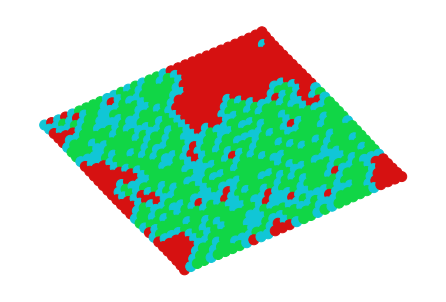

In [131]:
l, w = 32, 32
n = 1024
e = 0.002
beta, kappa = 0.6, 0.2
z_prop = 0.01
c = 1
G, St, Zt, Rt, zt, xt = lattice_sim(l, w, beta, kappa, z_prop, critical=c)
drawGz(G,zt)

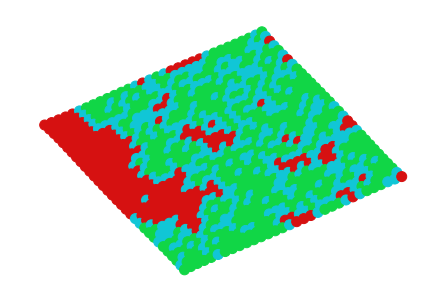

number of steps in epidemic: 1104
initial number of S: 1014
initial number of Z: 10
final number of S: 225
final number of Z: 442
final number of R: 357


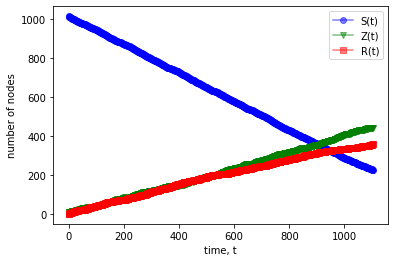

In [133]:
l, w = 32, 32
n = 1024
e = 0.002
beta, kappa = 0.6, 0.2
z_prop = 0.01
c = 1
G, St, Zt, Rt, zt, xt = lattice_sim(l, w, beta, kappa, z_prop, critical=c)
drawGz(G,zt)
t = len(St)
print(f'number of steps in epidemic: {t}')
print(f'initial number of S: {St[0]}')
print(f'initial number of Z: {Zt[0]}')
print(f'final number of S: {St[-1]}')
print(f'final number of Z: {Zt[-1]}')
print(f'final number of R: {Rt[-1]}')

# plot the S(t),I(t),R(t) time series nicely
fig = plt.figure()
ax1 = fig.add_subplot(111) # put multiple 
plt.plot(range(t), St, 'bo-', alpha=0.5,label='S(t)')  # plot the log-likelihood trajectory
plt.plot(range(t), Zt, 'gv-', alpha=0.5,label='Z(t)')  # plot the log-likelihood trajectory
plt.plot(range(t), Rt, 'rs-', alpha=0.5,label='R(t)')  # plot the log-likelihood trajectory
plt.ylabel('number of nodes')
plt.xlabel('time, t')
plt.legend(loc='upper right');
plt.show()

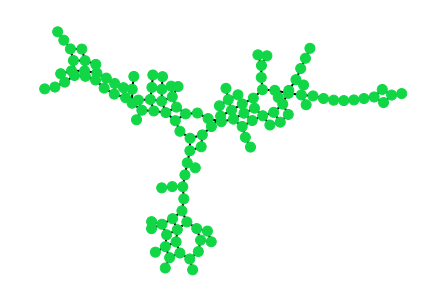

initial number of Z: 0
final number of Z: 127


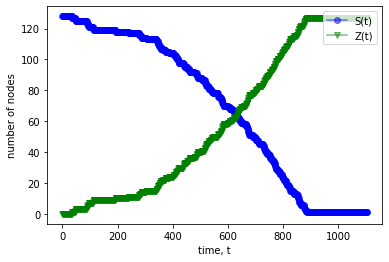

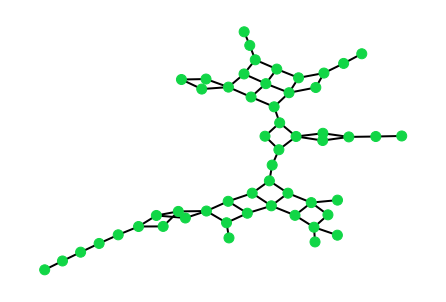

initial number of Z: 0
final number of Z: 54


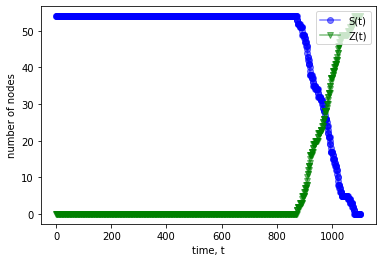

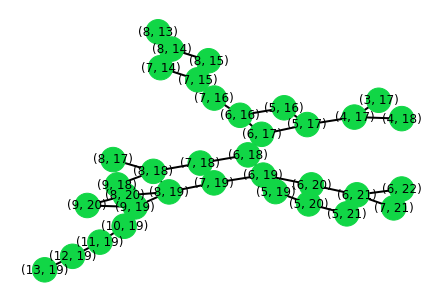

initial number of Z: 0
final number of Z: 35


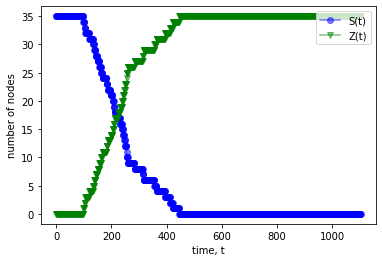

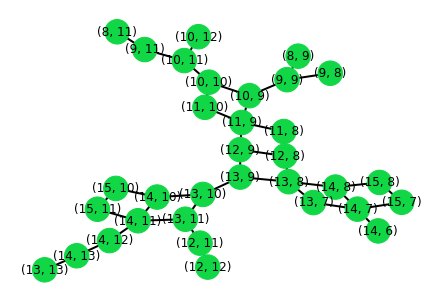

initial number of Z: 0
final number of Z: 33


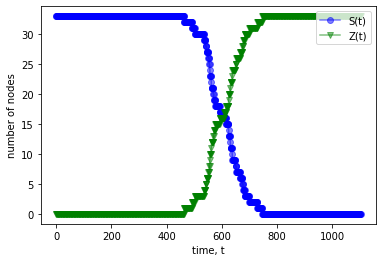

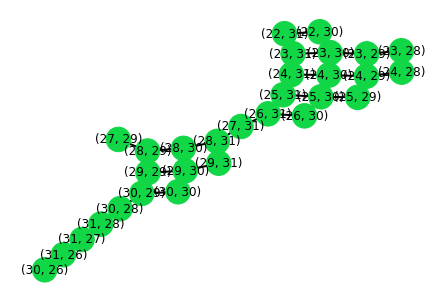

initial number of Z: 0
final number of Z: 29


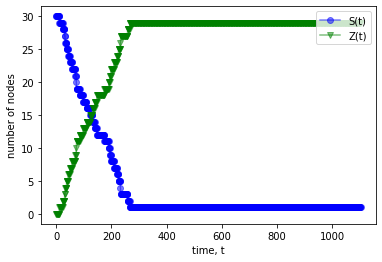

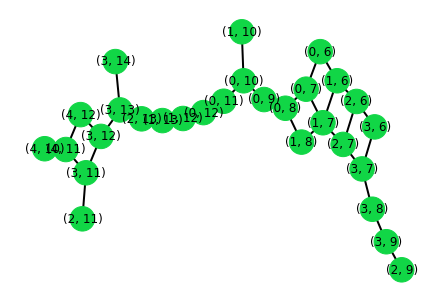

initial number of Z: 0
final number of Z: 29


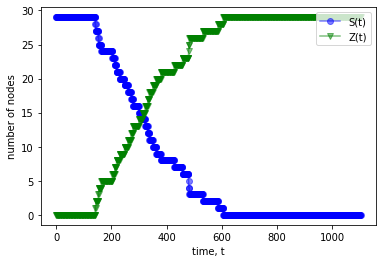

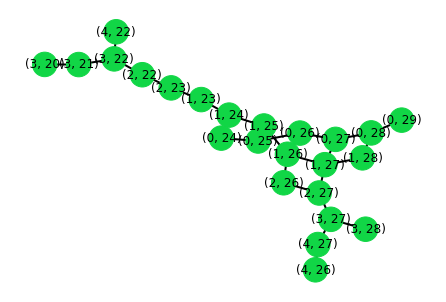

initial number of Z: 0
final number of Z: 24


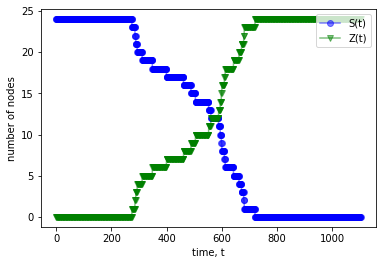

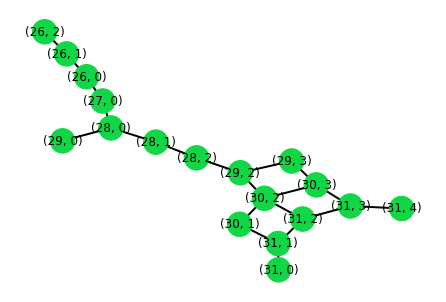

initial number of Z: 0
final number of Z: 18


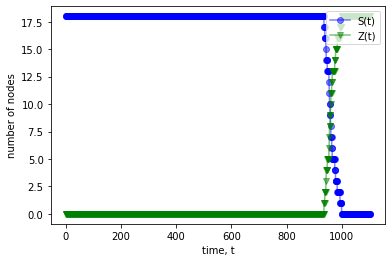

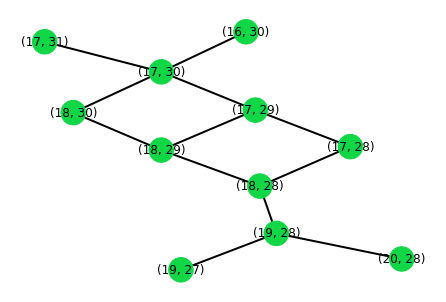

initial number of Z: 0
final number of Z: 11


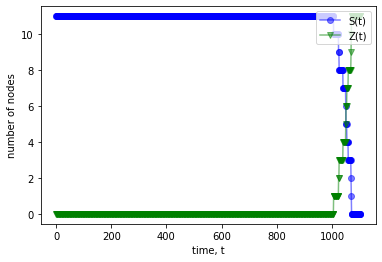

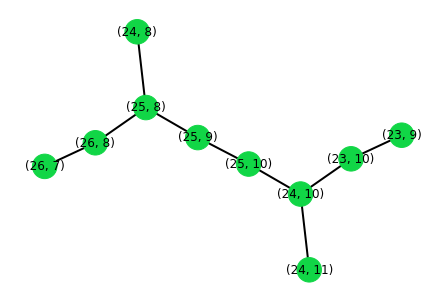

initial number of Z: 0
final number of Z: 10


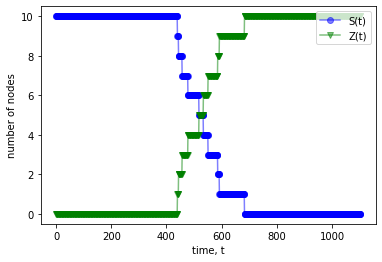

1.9


In [136]:
componentAnalysis(G, zt, St, Zt, xt)

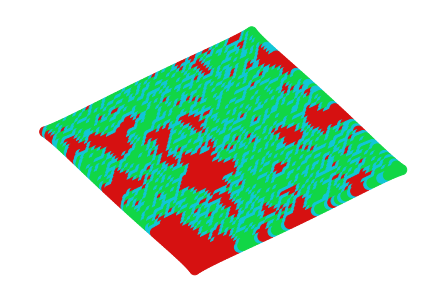

In [64]:
drawGz(G,zt)
#drawGz(Ge, zte)

number of steps in epidemic: 4446
initial number of S: 4056
initial number of Z: 40
final number of S: 974
final number of Z: 1753
final number of R: 1369


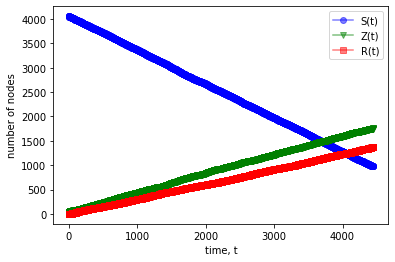

In [129]:
t = len(St)
print(f'number of steps in epidemic: {t}')
print(f'initial number of S: {St[0]}')
print(f'initial number of Z: {Zt[0]}')
print(f'final number of S: {St[-1]}')
print(f'final number of Z: {Zt[-1]}')
print(f'final number of R: {Rt[-1]}')

# plot the S(t),I(t),R(t) time series nicely
fig = plt.figure()
ax1 = fig.add_subplot(111) # put multiple 
plt.plot(range(t), St, 'bo-', alpha=0.5,label='S(t)')  # plot the log-likelihood trajectory
plt.plot(range(t), Zt, 'gv-', alpha=0.5,label='Z(t)')  # plot the log-likelihood trajectory
plt.plot(range(t), Rt, 'rs-', alpha=0.5,label='R(t)')  # plot the log-likelihood trajectory
plt.ylabel('number of nodes')
plt.xlabel('time, t')
plt.legend(loc='upper right');
plt.show()